# Qualifying Bahrain 

In this Notebook I'll dive into the qualifying session of the first round in the 2024 F1 Season. I'll compare two drivers for each qualifying session

In [1]:
# import packages
import os 
import numpy as np
import fastf1 as ff1
import pandas as pd 
import matplotlib.pyplot as plt
from fastf1.core import Laps
from datetime import timedelta 
from fastf1.ergast import Ergast
import seaborn as sns
import fastf1.plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
import sys
sys.path.insert(0, "../")
from settings import CACHE_FOLDER_PATH
from utlis import *

In [2]:
setup_cache(CACHE_FOLDER_PATH)

In [3]:
session = fastf1.get_session(2024, 'Bahrain', 'Q')
session.load()
circuit_info = session.get_circuit_info()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

In [71]:
session.laps.split_qualifying_sessions()

[                      Time Driver DriverNumber                LapTime  \
 0   0 days 00:22:20.980000    VER            1                    NaT   
 1   0 days 00:23:51.011000    VER            1 0 days 00:01:30.031000   
 2   0 days 00:25:59.737000    VER            1 0 days 00:02:08.726000   
 3   0 days 00:31:09.934000    VER            1                    NaT   
 4   0 days 00:32:40.094000    VER            1 0 days 00:01:30.160000   
 ..                     ...    ...          ...                    ...   
 262 0 days 00:25:16.360000    GAS           10 0 days 00:01:31.281000   
 263 0 days 00:27:06.107000    GAS           10 0 days 00:01:49.747000   
 264 0 days 00:31:23.187000    GAS           10                    NaT   
 265 0 days 00:32:54.135000    GAS           10 0 days 00:01:30.948000   
 266 0 days 00:34:56.285000    GAS           10 0 days 00:02:02.150000   
 
      LapNumber  Stint             PitOutTime              PitInTime  \
 0          1.0    1.0 0 days 00:20:10

In [72]:
q1,q2,q3 = session.laps.split_qualifying_sessions()

In [73]:
q1['LapTime'] = q1['LapTime'].dt.total_seconds()
q2['LapTime'] = q2['LapTime'].dt.total_seconds()
q3['LapTime'] = q3['LapTime'].dt.total_seconds()

C:\Users\ricca\AppData\Local\Temp\ipykernel_26540\1978635176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1['LapTime'] = q1['LapTime'].dt.total_seconds()
C:\Users\ricca\AppData\Local\Temp\ipykernel_26540\1978635176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['LapTime'] = q2['LapTime'].dt.total_seconds()
C:\Users\ricca\AppData\Local\Temp\ipykernel_26540\1978635176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [74]:
drivers = q1['Driver'].unique()

In [75]:
q1_times = q1.groupby('Driver')['LapTime'].min()
q2_times = q2.groupby('Driver')['LapTime'].min()
q3_times = q3.groupby('Driver')['LapTime'].min()

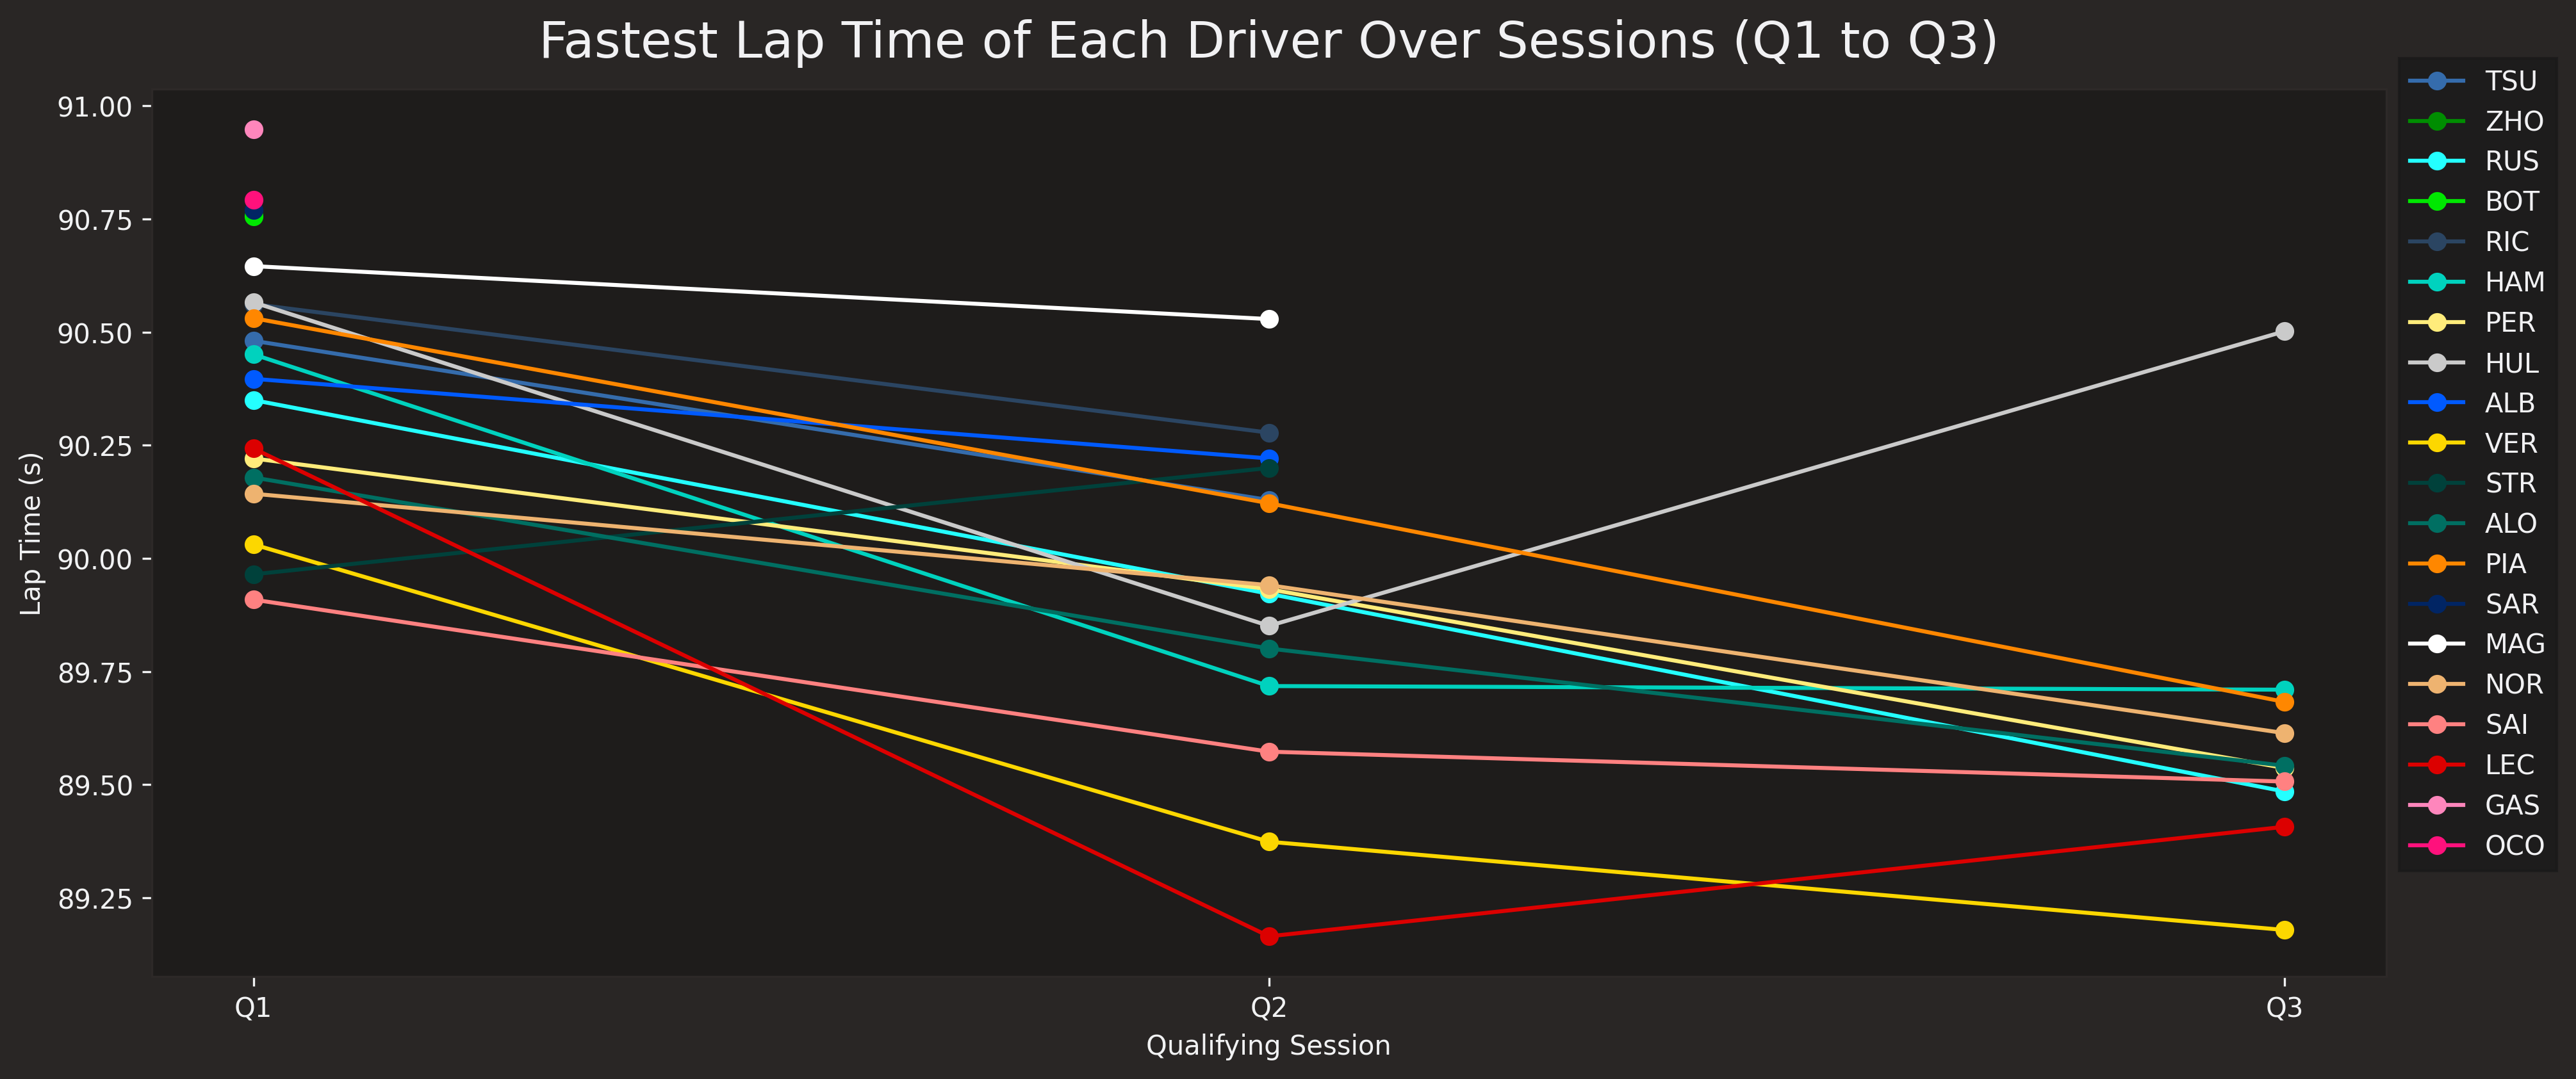

In [76]:
# Get a list of all unique drivers across all sessions
all_drivers = set(q1['Driver']).union(set(q2['Driver']), set(q3['Driver']))

# Set the figsize and dpi parameters
plt.figure(figsize=(15, 6), dpi=300)

# Iterate over each driver
for driver in all_drivers:
    # Initialize lists to store lap times and sessions for the current driver
    driver_lap_times = []
    driver_sessions = []

    # Iterate over each session and collect lap times and sessions for the current driver
    for round , q_times in enumerate([q1, q2, q3], start=1):
        # Get the fastest lap time of the current driver in this session
        fastest_lap_time = q_times[q_times['Driver'] == driver]['LapTime'].min()
        
        # Append the fastest lap time and session to the lists
        driver_lap_times.append(fastest_lap_time)
        driver_sessions.append(round)

    # Get the color for the current driver
    color = fastf1.plotting.driver_color(driver) 
    
    # Plot the driver's fastest lap times
    plt.plot(driver_sessions, driver_lap_times, marker='o', label=driver, color=color)

# Adding labels and title
plt.xlabel('Qualifying Session')
plt.ylabel('Lap Time (s)')
plt.title('Fastest Lap Time of Each Driver Over Sessions (Q1 to Q3)')
plt.xticks([1, 2, 3], ['Q1', 'Q2', 'Q3']) 

# Add legend outside of the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1.05))

# Show the plot
plt.show()



You can observe a brief overview of the evolution from Q1 to Q3. It's notable that LEC had a faster lap in Q2 compared to VER in Q3. Conversely, you can clearly discern the improvement in performance of VER throughout the entire session. The decline of LEC's performance can maybe be because of the tyre degredation. So lets the tyre life 

C:\Users\ricca\AppData\Local\Temp\ipykernel_26540\1512397125.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['Time'] = pd.to_timedelta(drv_laps['Time'])


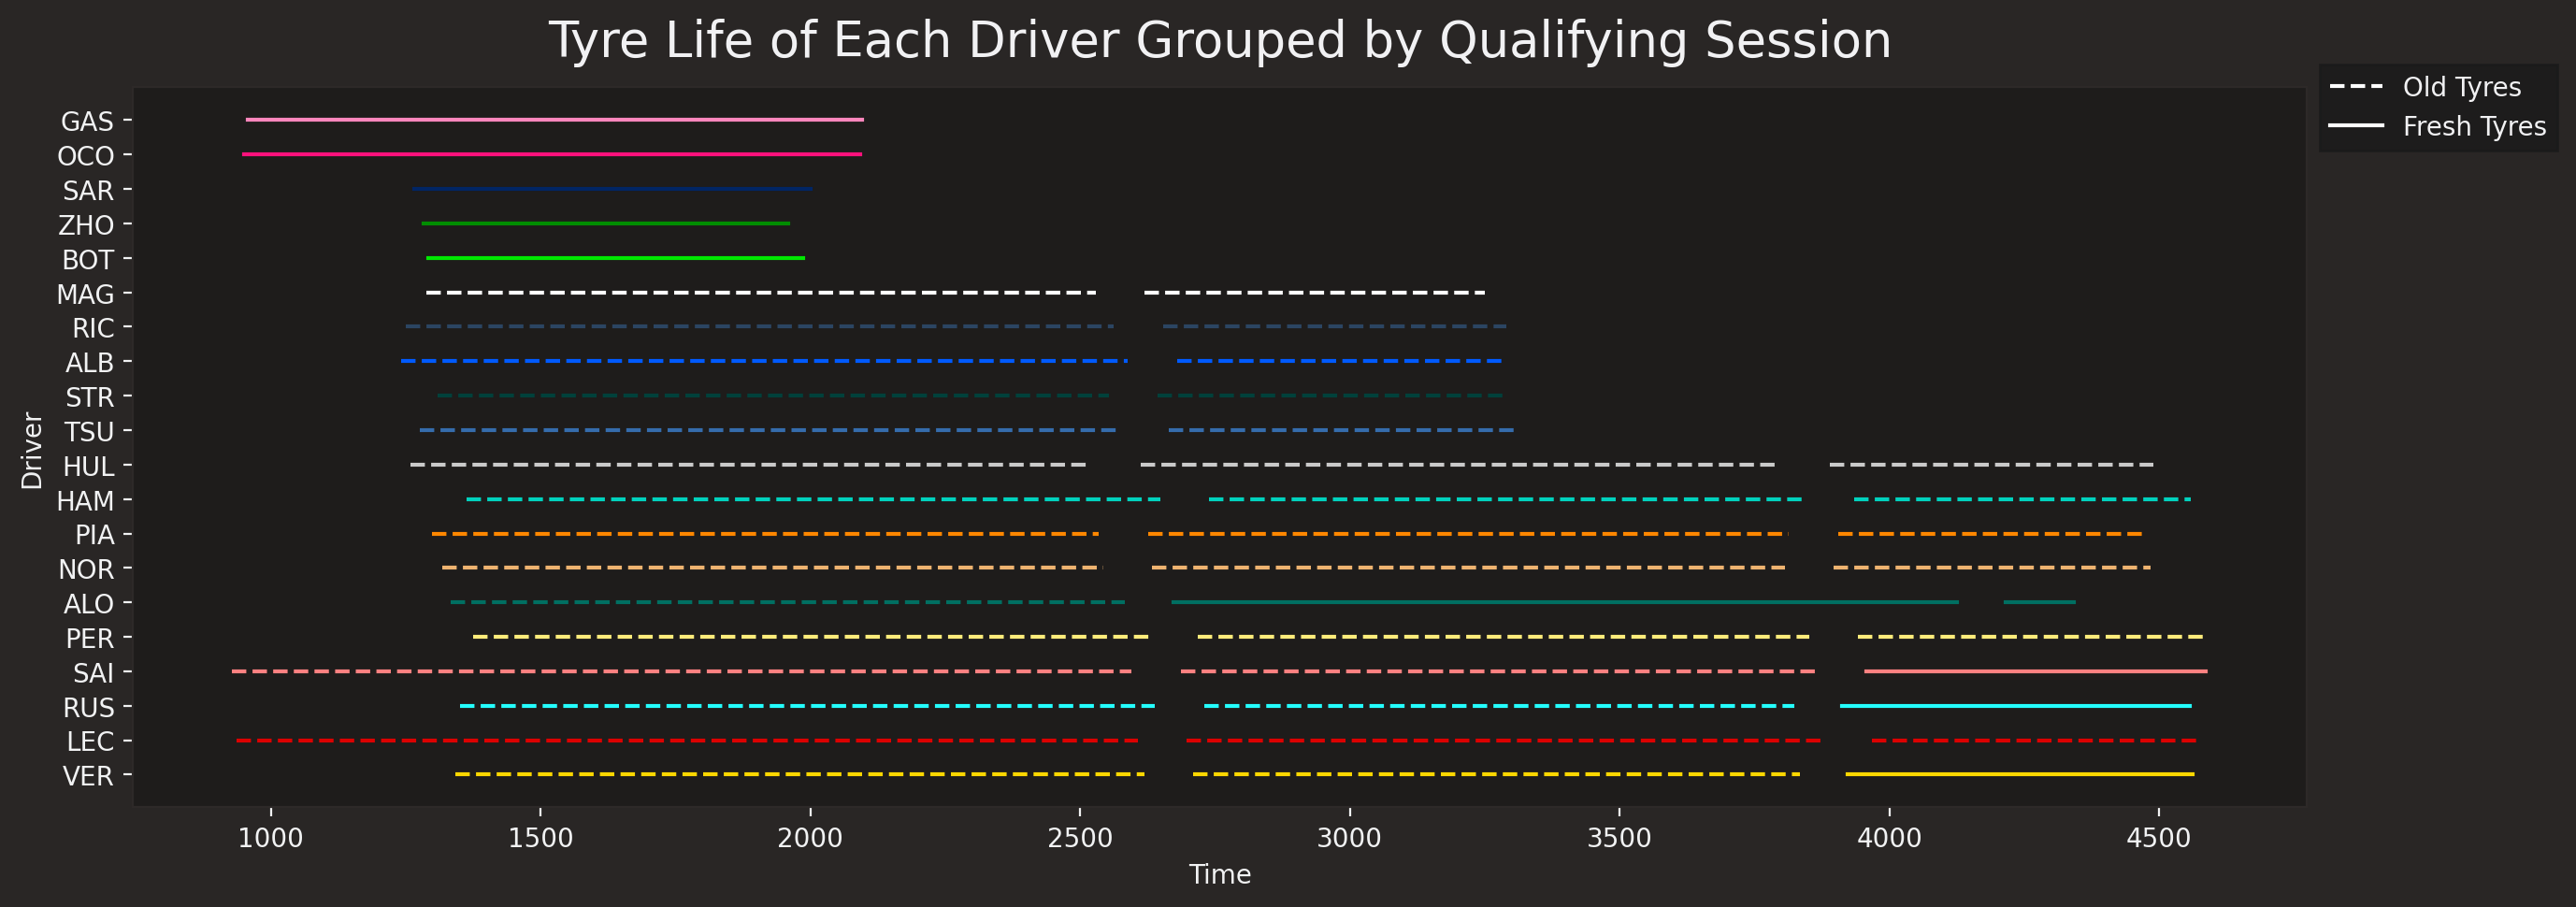

In [77]:
# Set the figsize and dpi parameters
fig, ax = plt.subplots(figsize=(15, 5), dpi=200)

# Initialize variables to keep track of labels
old_tyre_label_added = False
fresh_tyre_label_added = False

# Iterate over each qualifying session
for sess in [q1, q2, q3]:
    # Iterate over each driver in the session
    for drv in sess['Driver'].unique():
        
        # Filter laps for the current driver
        drv_laps = sess[sess['Driver'] == drv]
        
        # Check if FreshTyre is False for any lap of the current driver
        if not drv_laps['FreshTyre'].all():
            linestyle = '--'  
            label = 'Old Tyres'
            if not old_tyre_label_added:
                # Plot the label if it hasn't been added yet
                ax.plot([], [], linestyle=linestyle, label=label, color='w')
                old_tyre_label_added = True
        else:
            linestyle = '-'
            label = 'Fresh Tyres'
            if not fresh_tyre_label_added:
                # Plot the label if it hasn't been added yet
                ax.plot([], [], linestyle=linestyle, label=label, color='w')
                fresh_tyre_label_added = True
        
        # Convert the 'Time' column to timedelta format
        drv_laps['Time'] = pd.to_timedelta(drv_laps['Time'])
        
        # Get driver abbreviation
        abb = drv_laps['Driver'].iloc[0]
        
        # Get driver color
        color = fastf1.plotting.driver_color(abb)
        
        # Plot the tyre life
        ax.plot(drv_laps['Time'].dt.total_seconds(), drv_laps['Driver'], color=color, linestyle=linestyle)

# Adding labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Driver')
ax.set_title('Tyre Life of Each Driver Grouped by Qualifying Session')

# Add legend outside of the plot
ax.legend(loc="upper left", bbox_to_anchor=(1, 1.05))

# Show the plot
plt.show()


As you can clearly see, LEC has had only older Tyre for the Qualifying. On the other hand VER has used the newer Tyres only for Q3, which in my opinion was a good idea. Furthermore, you can see that although GAS and OCO had newer Tyres they didn't get into Q2, which shows that they've had Problems with their cars. 

# Telemetry 

![Bahrain Circuit](https://media.formula1.com/image/upload/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Bahrain_Circuit.png.transform/9col-retina/image.png)


### Fastest vs. Slowest 
Since LEC has had the fastest Lap time in the second Qualifying I'll take him as a reference this means I'll analyize LEC vs GAS

In [96]:
fastest_lec = session.laps.pick_driver('LEC').pick_fastest().get_car_data().add_distance()
fastest_gas = session.laps.pick_driver('GAS').pick_fastest().get_car_data().add_distance()

In [100]:
fastest_lec['sec'] = fastest_lec['Time'].dt.total_seconds()
fastest_gas['sec'] = fastest_gas['Time'].dt.total_seconds()

In [109]:
fastest_gas

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,sec
0,2024-03-01 16:17:59.042,10782,293,7,100,False,12,car,0 days 00:00:00.182000,0 days 00:31:23.369000,14.812778,0.182
1,2024-03-01 16:17:59.242,10486,295,8,100,False,12,car,0 days 00:00:00.382000,0 days 00:31:23.569000,31.201667,0.382
2,2024-03-01 16:17:59.402,10606,297,8,100,False,12,car,0 days 00:00:00.542000,0 days 00:31:23.729000,44.401667,0.542
3,2024-03-01 16:17:59.602,10682,299,8,100,False,12,car,0 days 00:00:00.742000,0 days 00:31:23.929000,61.012778,0.742
4,2024-03-01 16:17:59.882,10798,301,8,100,False,12,car,0 days 00:00:01.022000,0 days 00:31:24.209000,84.423889,1.022
...,...,...,...,...,...,...,...,...,...,...,...,...
344,2024-03-01 16:19:28.722,10918,276,7,100,False,12,car,0 days 00:01:29.862000,0 days 00:32:53.049000,5277.019722,89.862
345,2024-03-01 16:19:29.002,11066,281,7,100,False,12,car,0 days 00:01:30.142000,0 days 00:32:53.329000,5298.875278,90.142
346,2024-03-01 16:19:29.242,11187,283,7,100,False,12,car,0 days 00:01:30.382000,0 days 00:32:53.569000,5317.741944,90.382
347,2024-03-01 16:19:29.482,11335,285,7,100,False,12,car,0 days 00:01:30.622000,0 days 00:32:53.809000,5336.741944,90.622


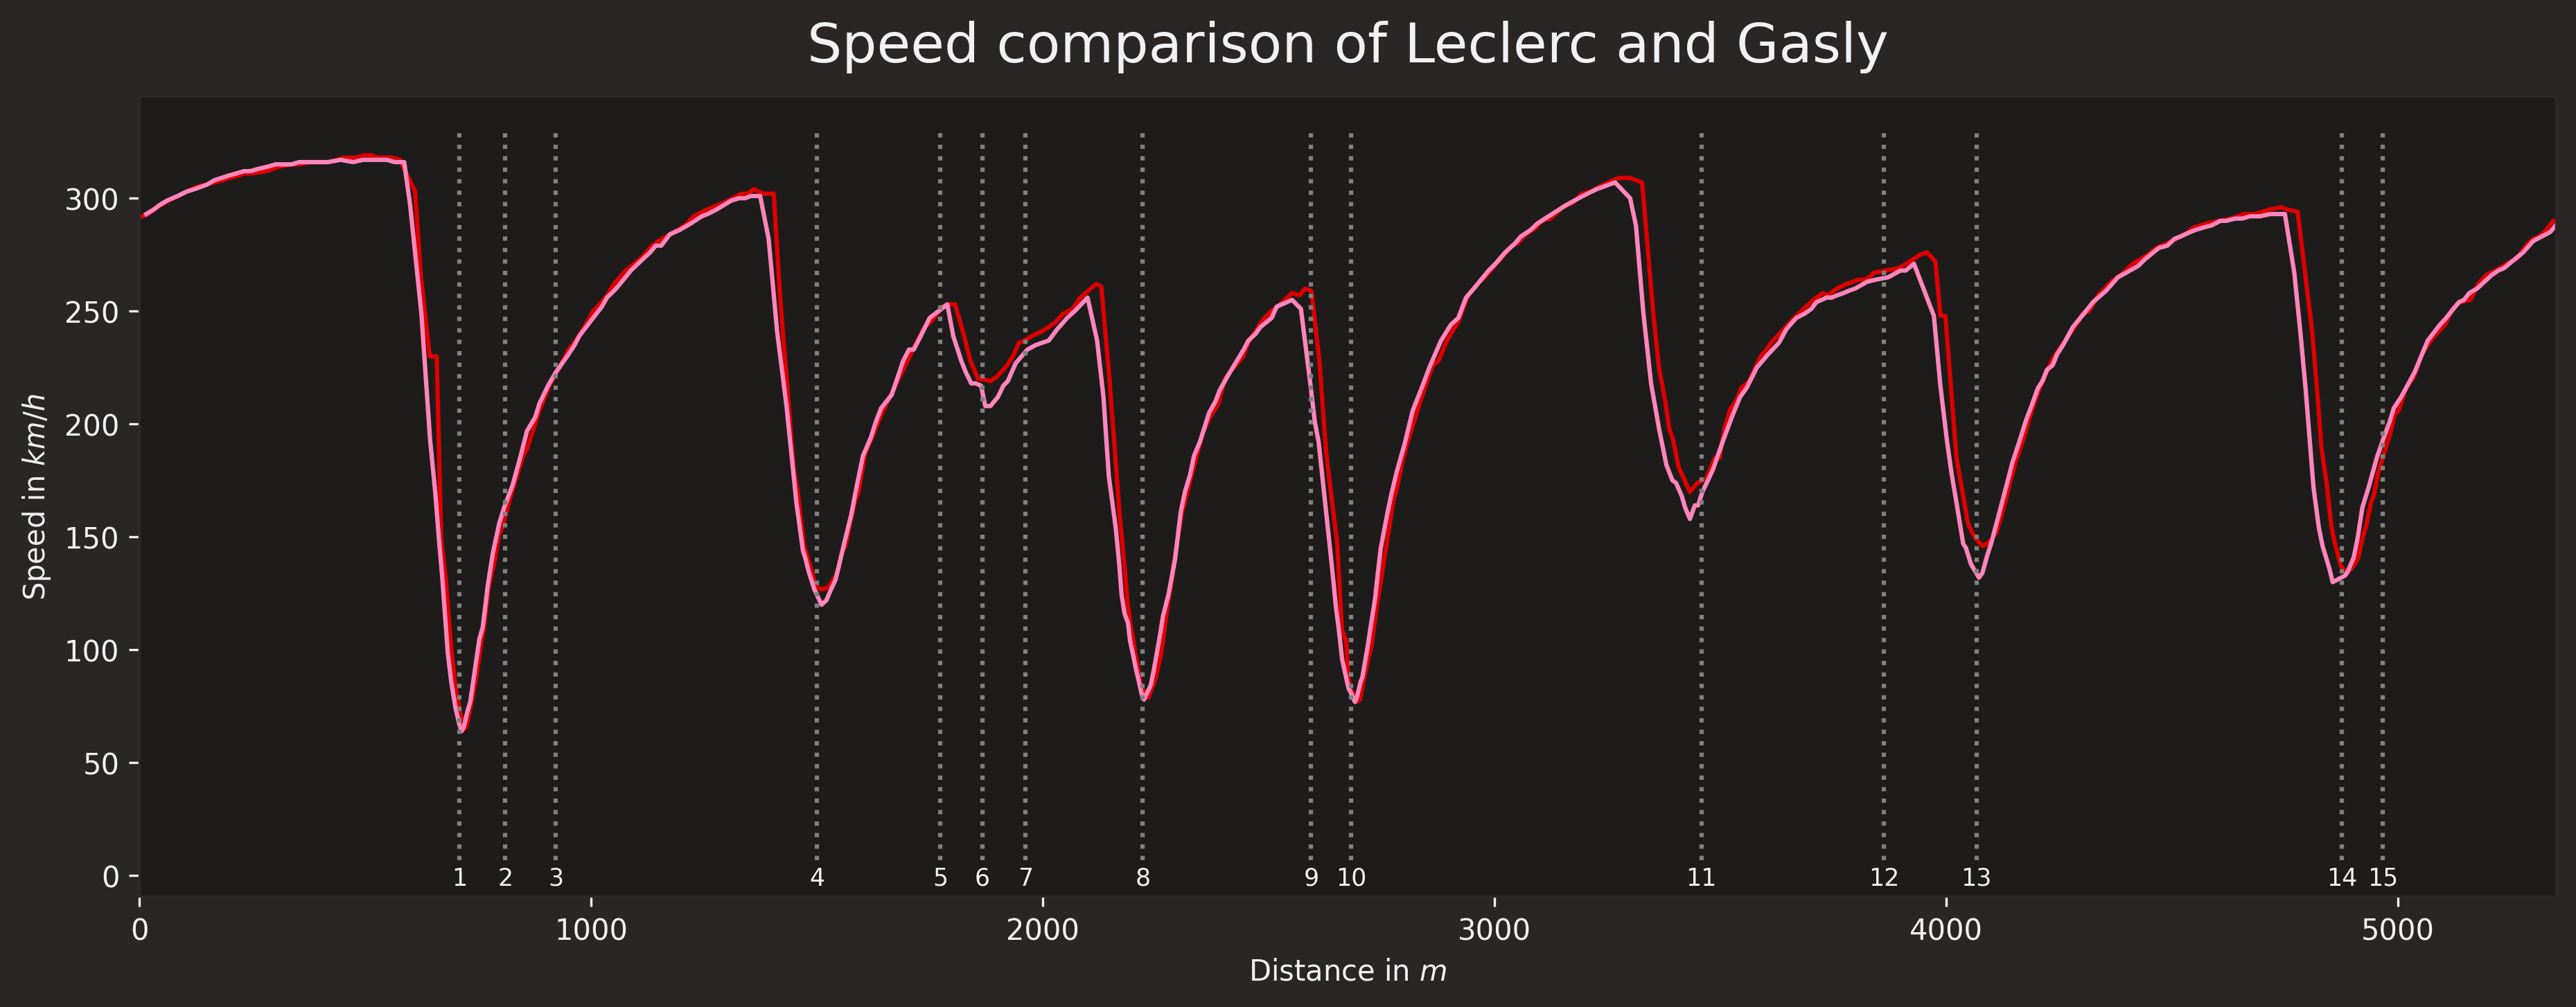

In [116]:
fer_col = fastf1.plotting.team_color('FER')
alp_col = fastf1.plotting.team_color('ALP')

fig, axs = plt.subplots(figsize=(15, 5), dpi=300)


axs.plot(fastest_lec['Distance'], fastest_lec['Speed'], color= fer_col)
axs.plot(fastest_gas['Distance'], fastest_gas['Speed'], color= alp_col)

v_min = fastest_lec['Speed'].min()
v_max = fastest_lec['Speed'].max()
axs.vlines(x=circuit_info.corners['Distance'], ymin=max(v_min-100, 7), ymax=v_max+10,
           linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    axs.text(corner['Distance'], max(v_min-150, 0), txt,
             va='center_baseline', ha='center', size='small')
    plt.xlim(0, fastest_gas['Distance'].max())
    plt.xlabel('Distance in $m$')
    plt.ylabel('Speed in $km/h$')
    plt.title('Speed comparison of Leclerc and Gasly')